In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow.keras.backend as K


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/ubuntu/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/ubuntu/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/home/ubunt

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [4]:
# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=73)


In [5]:
print(data.feature_names)
print(data.target_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [6]:
class RBFLayer(tf.keras.layers.Layer):
    def __init__(self, units, gamma=1.0, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.constant(gamma)
    
    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(self.units, input_shape[-1]),
                                       initializer='uniform',
                                       trainable=True)
        self.built = True

    def call(self, inputs):
        diff = K.expand_dims(inputs, axis=1) - self.centers
        l2 = K.sum(K.square(diff), axis=-1)
        return K.exp(-self.gamma * l2)


In [7]:
# Build the RBF model
rbf_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    RBFLayer(units=10, gamma=0.5),  # RBF Layer
    Dense(1) 
])

rbf_model.compile(optimizer='adam', loss='mse', metrics=['mse'])
rbf_history =rbf_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))


Epoch 1/50


W0000 00:00:1735722543.729499  219423 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.9688 - mse: 5.9688 - val_loss: 3.1126 - val_mse: 3.1126
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.6936 - mse: 2.6936 - val_loss: 2.1548 - val_mse: 2.1548
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.9160 - mse: 1.9160 - val_loss: 1.6313 - val_mse: 1.6313
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5229 - mse: 1.5229 - val_loss: 1.3220 - val_mse: 1.3220
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1847 - mse: 1.1847 - val_loss: 1.1403 - val_mse: 1.1403
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0945 - mse: 1.0945 - val_loss: 1.0208 - val_mse: 1.0208
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9522 - mse: 0.9522 - val_loss: 0.9390 - val_mse: 0.9390
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9129 - mse: 0.9129 - val_loss: 0.8894 - val_mse: 0.8894
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8687 

In [8]:
# Build the Dense model
dense_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='sigmoid'),
    Dense(1)  # Output layer
])

# Compile the Dense model
dense_model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the Dense model
dense_history = dense_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))


Epoch 1/50


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.7177 - mse: 2.7177 - val_loss: 0.5931 - val_mse: 0.5931
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5180 - mse: 0.5180 - val_loss: 0.4062 - val_mse: 0.4062
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3727 - mse: 0.3727 - val_loss: 0.3449 - val_mse: 0.3449
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3219 - mse: 0.3219 - val_loss: 0.3211 - val_mse: 0.3211
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2999 - mse: 0.2999 - val_loss: 0.3198 - val_mse: 0.3198
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3045 - mse: 0.3045 - val_loss: 0.3124 - val_mse: 0.3124
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2815 - mse: 0.2815 - val_loss: 0.3034 - val_mse: 0.3034
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2835 - mse: 0.2835 - val_loss: 0.3040 - val_mse: 0.3040
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2743 

In [9]:
# Evaluate the RBF model
rbf_loss = rbf_model.evaluate(X_test, y_test, verbose=0)
print(f"RBF Model Loss: {rbf_loss[0]}")
# Evaluate the Dense model
dense_loss = dense_model.evaluate(X_test, y_test, verbose=0)
print(f"Dense Model Loss: {dense_loss[0]}")


RBF Model Loss: 0.5295587182044983
Dense Model Loss: 0.2751447260379791


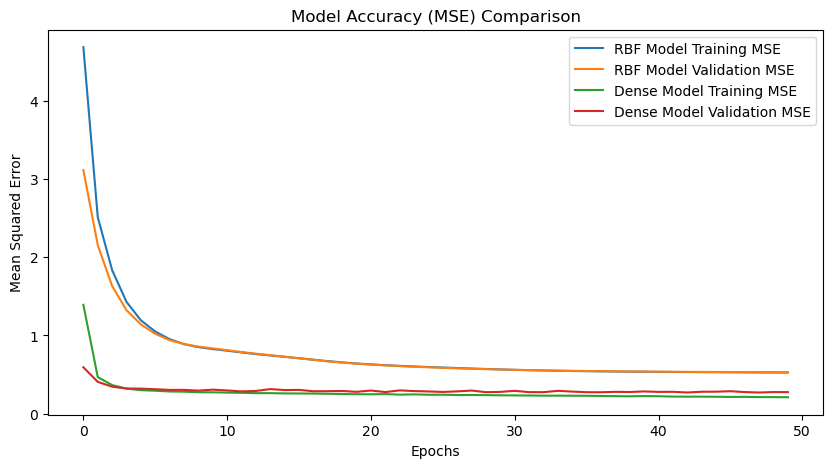

In [10]:
import matplotlib.pyplot as plt

# Plot the loss for both models
plt.figure(figsize=(10, 5))
plt.plot(rbf_history.history['mse'], label='RBF Model Training MSE')
plt.plot(rbf_history.history['val_mse'], label='RBF Model Validation MSE')
plt.plot(dense_history.history['mse'], label='Dense Model Training MSE')
plt.plot(dense_history.history['val_mse'], label='Dense Model Validation MSE')

plt.title('Model Accuracy (MSE) Comparison')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.savefig('model_loss_comparison.png')
plt.show()

In [11]:
if rbf_loss[0] < dense_loss[0]:
    print("The RBF model performed better.")
else:
    print("The Dense model performed better.")


The Dense model performed better.
